# Neural & Behavioral Modeling - Week 3 (Exercises)
by Chi-Lin Yu (psychilinyu@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

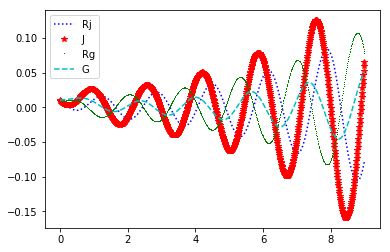

In [2]:
a,b,c,d,e,f = -3,4,-7,2,2,-1
Rj,J,Rg,G = [0.01],[0.01],[0.01],[0.01]
dt = .01
t=arange(0,9,dt)  # more than 9.6, the indices will become inf. Maybe need an upper bound ?

for i in t[0:-1]:
    # the last element
    Rj1,J1,Rg1,G1,=Rj[-1],J[-1],Rg[-1],G[-1] 
    # Euler integration
    Rj2 = Rj1 + dt*(a*Rj1+b*(J1-G1)*(1-abs(J1-G1))) 
    J2  = J1 + dt*(c*Rj1*(1-abs(Rj1))+d*J1)
    Rg2 = Rg1+ dt*(a*Rg1+b*(G1-J1)*(1-abs(G1-J1)))
    G2  = G1 + dt*(e*Rg1*(1-abs(Rg1))+f*G1)  
    #print(Rj2,J2,Rg2,G2)
    #print(i)
    # append
    Rj.append(Rj2)
    J.append(J2)
    Rg.append(Rg2)
    G.append(G2)

plot(t,Rj,'b:',t,J,'r*',t,Rg,'g,',t,G,'c--') 
legend(['Rj','J','Rg','G']);

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

(-50, 50)

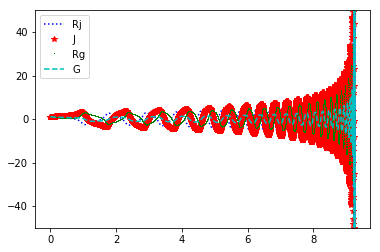

In [3]:
a,b,c,d,e,f = -3,4,-7,2,2,-1
Rj,J,Rg,G = [1],[1],[1],[1]
dt = .001
t=arange(0,40,dt)  # more than 9.6, the indices will become inf. Maybe need an upper bound ?

for i in t[0:-1]:
    # the last element
    Rj1,J1,Rg1,G1,=Rj[-1],J[-1],Rg[-1],G[-1] 
    # Euler integration
    Rj2 = Rj1 + dt*(a*Rj1+b*(J1-G1)*(1-abs(J1-G1))) 
    J2  = J1 + dt*(c*Rj1*(1-abs(Rj1))+d*J1)
    Rg2 = Rg1+ dt*(a*Rg1+b*(G1-J1)*(1-abs(G1-J1)))
    G2  = G1 + dt*(e*Rg1*(1-abs(Rg1))+f*G1)  
    #print(Rj2,J2,Rg2,G2)
    #print(i)
    # append
    Rj.append(Rj2)
    J.append(J2)
    Rg.append(Rg2)
    G.append(G2)

plot(t,Rj,'b:',t,J,'r*',t,Rg,'g,',t,G,'c--') 
legend(['Rj','J','Rg','G']);
Rjlist1 = Rj
axes = gca()
axes.set_ylim([-50,50])

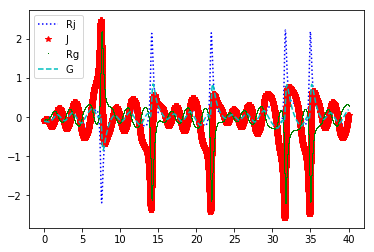

In [14]:
a,b,c,d,e,f = -3,4,-7,2,2,-1
Rj,J,Rg,G = [-0.1],[-0.1],[-0.1],[-0.1]
dt = .001
t=arange(0,40,dt)  # more than 9.6, the indices will become inf. Maybe need an upper bound ?

for i in t[0:-1]:
    # the last element
    Rj1,J1,Rg1,G1,=Rj[-1],J[-1],Rg[-1],G[-1] 
    # Euler integration
    Rj2 = Rj1 + dt*(a*Rj1+b*(J1-G1)*(1-abs(J1-G1))) 
    J2  = J1 + dt*(c*Rj1*(1-abs(Rj1))+d*J1)
    Rg2 = Rg1+ dt*(a*Rg1+b*(G1-J1)*(1-abs(G1-J1)))
    G2  = G1 + dt*(e*Rg1*(1-abs(Rg1))+f*G1)  
    #print(Rj2,J2,Rg2,G2)
    #print(i)
    # append
    Rj.append(Rj2)
    J.append(J2)
    Rg.append(Rg2)
    G.append(G2)

plot(t,Rj,'b:',t,J,'r*',t,Rg,'g,',t,G,'c--') 
legend(['Rj','J','Rg','G']);
Rjlist2 = Rj

## 2 Fix the simulation of "Tragedy of the Commons" (5 points)

Tren's simulation of <a href="https://en.wikipedia.org/wiki/System_archetype#Tragedy_of_the_commons">Tragedy of the Commons</a> ported from STELLA to PYTHON did not reproduce the follow model dynamics:

<img src= http://wiki.mbalib.com/w/images/1/13/%E5%85%B1%E5%90%8C%E7%9A%84%E6%82%B2%E5%89%A7%E6%A8%A1%E6%8B%9F%E7%BB%93%E6%9E%9C.jpg>

Please help Tren to fix his broken(?) simulation:

1.6759856186141577


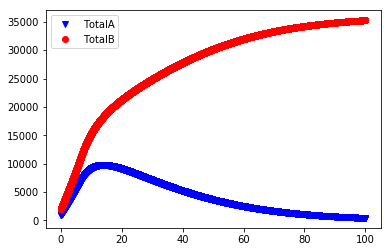

In [16]:
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
dt=.01 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)

print(ResPerProject)
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);

Please ignore the physical meanings of those obscure expressions like the definition of Risk:

<center><i>Risk=0 if ResPerProject >= 3 else (3-ResPerProject)</i></center>

Just by looking at Tren's figure, we know that TotalB did not collapse like TotalA when the resource per project (i.e., ResPerProject) became exhausted.

Please check the excitation and inhibiton terms for "TotalA" & "TotalB" and do whatever you can to collapse both variables for small ResPerProject. Note that this is exactly the thinking/experimental process of how a modeller revises his/her model to better fit data.

Note : incomeA/incomeB versus TotalA/TotalB

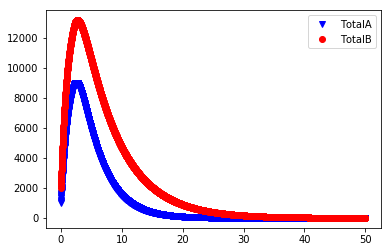

In [207]:
Total = 100000 # Specify total 
#TotalRes=[100] # Model parameter
#TotalA,TotalB=[1000,1000,1000,1000,1000,1000],[2000,2000,2000,2000,2000,2000] # Initial value
TotalA,TotalB=[1000],[2000] # Initial value
dt=.01 # step size for numerical integration
t=arange(0,50,dt) # integration period
for i in t:
    
    TotalRes1 = Total/100
    Total =  Total - TotalRes1
    #TotalRes1 = TotalRes[-1]
    
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes1/(ProjectA+ProjectB)
    
    #TotalAd,TotalBd=TotalA[-6],TotalB[-6]
    #ProjectAd=TotalAd/500
    #ProjectBd=TotalBd/600
    #ResPerProject=TotalRes/(ProjectAd+ProjectBd)
    
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    #print(IncomeA,IncomeB)
    
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
    
    #if TotalRes1 < 0:
    #    TotalRes2 = 0
    #else:
    #    TotalRes2 = TotalRes1 - dt*1
    TotalRes2 = TotalRes1 
    TotalRes.append(TotalRes2)

plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);